# Principle Component Analysis

### Statistical Learning

 |                | Supervised     |         Unsupervised     |
 |:---------------|:--------------:|:------------------------:|
 | **Discrete**   | Classification | Clustering               |   
 | **Continuous** | Regression     | Dimensionality Reduction |



### Directions of Maximum Variance
- Let $X\in\mathbb{R}^N$ be a continuous random variable with $\mathbb{E}\left[X\right]=0$ mean and covariance matrix $C$. What is the direction of maximum variance?
- For any vector $a\in\mathbb{R}^N$: $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E}\left[\left(a^T X - 0\right)\left(X^T a - 0\right)\right] = \mathbb{E}\left[a^T \left(XX^T\right)\,a\right]$ so $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$
- We have to maximize this such that $a^2\!=\!1$

### Constrained Optimization
- **Lagrange multiplier**: extra term with new parameter $\lambda$: $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1)\right]$
- Partial derivatives vanish at optimum: $\displaystyle \frac{\partial}{\partial\lambda} \rightarrow\ \  \hat{a}^2\!-\!1 = 0\ \ $, $\displaystyle \frac{\partial}{\partial a_k} \rightarrow\ \  $?

- $\displaystyle \max_{a\in{}\mathbb{R}^N}  \left[ \sum_{i,j} a_i C_{ij} a_j - \lambda\,\left(\sum_i a_i^2 - 1\right) \right]$
- Partial derivatives $\partial \big/ \partial a_k$ vanish at optimum: $\displaystyle \sum_{i,j} \frac{\partial a_i}{\partial a_k} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \frac{\partial a_j}{\partial a_k} - 2\lambda\,\left(\sum_i a_i \frac{\partial a_i}{\partial a_k}\right)  $ 
- $=\displaystyle \sum_{i,j} \delta_{ik} C_{ij} a_j + \sum_{i,j} a_i C_{ij} \delta_{jk} - 2\lambda\,\left(\sum_i a_i \delta_{ik}\right)  $ 
- $=\displaystyle \sum_{j} C_{kj} a_j + \sum_{i} a_i C_{ik}  - 2\lambda\,a_k $

- With vectors and matrices
    - $\displaystyle  C \hat{a} + C^T\hat{a} - 2\hat{\lambda} \hat{a} = 0$ but $C$ is symmetric 
    - $\displaystyle  C\,\hat{a} = \hat{\lambda}\,\hat{a} $ which is an eigenproblem

- The value of maximum variance is $\displaystyle  \hat{a}^TC\,\hat{a} = \hat{a}^T \lambda\,\hat{a} = \lambda\, \hat{a}^T\hat{a} = \lambda$
- The largest eigenvalue $\lambda_1$
- The direction of maximum variance is the corresponding eigenvector $a_1$: $\displaystyle  Ca_1 = \lambda_1 a_1 $
- This is the **1st Principal Component** 

### 2nd Principal Component
- Direction of largest variance uncorrelated to 1st PC: $\displaystyle  \hat{a} = \arg\max_{a\in{}\mathbb{R}^N} \left[a^T C\,a - \lambda\,(a^2\!-\!1) - \lambda'(a^T C\,a_1) \right]$
- Partial derivatives vanish at optimum: $\displaystyle 2C\,\hat{a} - 2\lambda\,\hat{a}-\lambda'Ca_1 = 0$

- Multiply by $a_1^T\cdot$: $\displaystyle 2a_1^TC\hat{a} - 2a_1^T\lambda{}\hat{a}-a_1^T\lambda'Ca_1 = 0$
- $\displaystyle 0 - 0 - \lambda'\lambda_1 = 0 \ \ \rightarrow\ \  \lambda'=0$
- Still just an eigenproblem: $\displaystyle  C\,\hat{a} = \lambda\,\hat{a} $
- Solution $\lambda_2$ and $a_2$

### PCA 
- Spectral decomposition or eigenvalue decomposition or eigendecomposition
- Let $\lambda_1\geq\lambda_2\geq\dots\geq\lambda_N\geq{}0$ be the eigenvalues of $C$ and ${e}_1,\dots,{e}_N$ the corresponding eigenvectors $\displaystyle  C = \sum_{k=1}^N\ \lambda_k\left({e}_k\,{e}_k^T\right) $
- Consider $\displaystyle C\,e_l = \sum_k \lambda_k\,e_k\left(e_k^T e_l\right) = \lambda_l\,e_l$ for any $l$
- Matrix form
    - With diagonal $\Lambda$ matrix of the eigenvalues and an $E$ matrix of $[{e}_1, \dots, {e}_N]$: $\displaystyle  C = E\ \Lambda\ E^T$
    - The eigenvectors of largest eigenvalues capture the most variance
    - If keeping only $K<N$ eigenvectors, the best approximation is taking the first $K$ PCs
    - $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) =  E_K\Lambda_KE_K^T$
- The eigenvectors of largest eigenvalues capture the most variance $\displaystyle  C \approx C_K = \sum_{k=1}^K\ \lambda_k\left({e}_k\,{e}_k^T\right) = \sum_{k=1}^K\ \lambda_k\,P_k$
- And the remaining eigenvectors span the subspace with the least variance: $\displaystyle  C - C_K = %\sum_{l=K+1}^N\ \lambda_l\left(\hat{e}_l\,\hat{e}_l^T\right) =\sum_{l=K+1}^N\ \lambda_l\,P_l$

#### New Coordiante System
- The $E$ matrix of eigenvectors is a rotation, $E\,E^T = I$: $\displaystyle  Z = E^T\, X $
- A truncated set of eigenvectors $E_K$ defines a projection: $\displaystyle  Z_K = E_K^T\, X $ and $\displaystyle  X_K = E_K Z_K = E_K E_K^T\, X = P_K\,X $

#### Samples
- Set of $N$-vectors arranged in matrix $X=\left[x_1, x_2, \dots, x_n \right]$ with average of 0 <br>
- Sample covariance matrix is $\displaystyle C = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T = \frac{1}{n\!-\!1}\ X X^T $
- Singular Value Decomposition (SVD): $\displaystyle X = U W V^T$ where $U^TU=I$, $W$ is diagonal, and $V^TV=I$
- Hence
    - $\displaystyle C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T$
    - So, if $C=E\Lambda E^T$ then $E = U$ and $\displaystyle \Lambda = \frac{1}{n\!-\!1}\  W^2$

### Manual Implementation

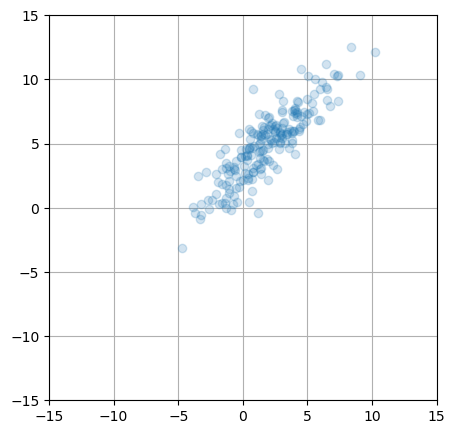

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
np.random.seed(42)

# Inital data creation
S = scipy.stats.norm(0,1).rvs((2,200))
S[0,:] *= 4  # scale axis 0
f = np.pi / 4    # rotate by 45 degrees
R = np.array([[np.cos(f), -np.sin(f)],
              [np.sin(f),  np.cos(f)]]) 

X = R @ S
X += np.array([[2],[5]]) # shift

plt.figure(figsize=(5,5))
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.plot(X[0,:], X[1,:], 'o', alpha=0.2)
plt.grid()

In [3]:
avg = X.mean(axis=1, keepdims=True)
X -= avg # subtract sample mean
C = X @ X.T / (X[0,:].size - 1) # sample covariance matrix
L, E = np.linalg.eig(C) # eigenstuff
E, L, E_same = np.linalg.svd(C) # SVD
U, W, V = np.linalg.svd(X)
E @ E.T
U, W**2 / (X.shape[1] - 1) 

(array([[-0.68768972, -0.72600472],
        [-0.72600472,  0.68768972]]),
 array([13.87777109,  0.96469808]))

### SciKit Version

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = X.shape[0])
pca.fit(X.T) # different convention: row vs col !!!
E, L = pca.components_.T, pca.explained_variance_
E, L

(array([[ 0.68768972,  0.72600472],
        [ 0.72600472, -0.68768972]]),
 array([13.87777109,  0.96469808]))

### Projection

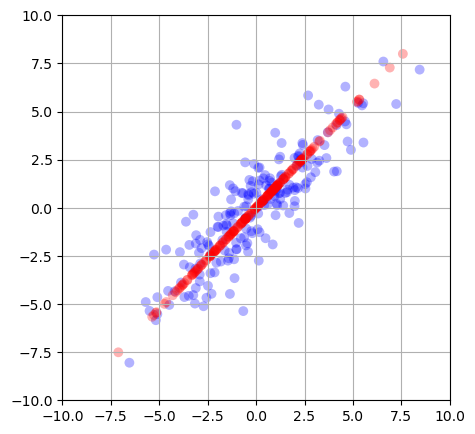

In [6]:
# projected points
P = U[:,:1] @ U[:,:1].T @ X

plt.figure(figsize=(5,5)) 
plt.scatter(X[0,:], X[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')
plt.scatter(P[0,:], P[1,:], marker='o',color='r', s=50, alpha=0.3, edgecolor='none')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

### Whitening
- Frequently used to preprocess data, e.g., in signal processing: $ \displaystyle A = \Lambda^{-1/2}\ E^T\ X$

### Scree Plot
- The eigenvalue spectrum: $ \big\{ \lambda_1, \lambda_2, \dots, \lambda_N \big\}$
- How many important directions? Keep $K =\,?$ principal components
    - Look for the elbow, ie cut-off point
- Explained variance of components: $\mathbb{Var}[X\pm{}Y] = \mathbb{Var}[X]+\mathbb{Var}[Y]$ if uncorrelated

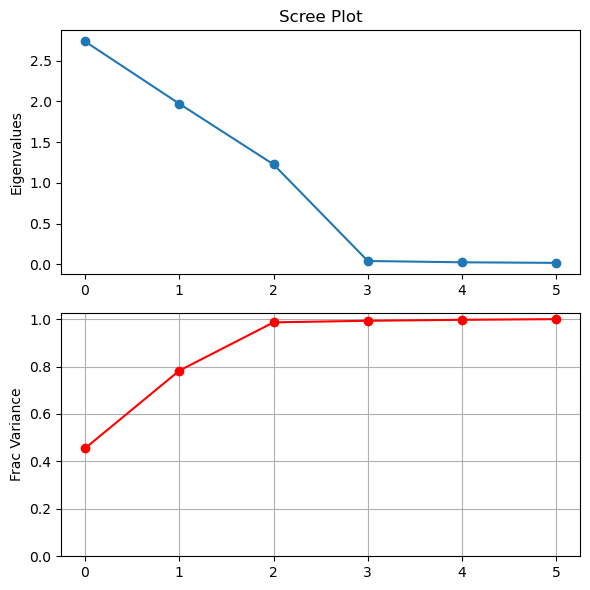

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate random correlated data
np.random.seed(42)
n_samples = 400
n_features = 6

# Random low-rank structure to induce correlations
A = np.random.randn(n_features, 3)   # rank-3 structure
Z = np.random.randn(n_samples, 3)
X = Z @ A.T + 0.2 * np.random.randn(n_samples, n_features)  # add small noise

# Standardize (always recommended before PCA)
X_std = StandardScaler().fit_transform(X)

# Run PCA
pca = PCA()
pca.fit(X_std)

# Eigenvalues (variances of the PCs)
L = pca.explained_variance_

# Scree plot
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(L, 'o-')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.subplot(2,1,2)
cl = np.cumsum(L)
plt.plot(cl / cl[-1], 'o-r')
plt.ylabel('Frac Variance')
plt.ylim(0, None)
plt.grid()
plt.tight_layout()
plt.show()